In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [113]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [114]:
from glob import glob

In [115]:
import pickle

In [134]:
# Load the dataset
file_path1 = glob(f"./day*.csv")
file_path2 = glob(f"./poison*.csv")

In [135]:
file_path2[0][18:]

''

In [136]:
file_path1 = sorted(file_path1, key=lambda x: int(x[5:].split('.')[0]))

In [137]:
file_path1

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [138]:
file_path2 = sorted(file_path2, key=lambda x: int(x[8:].split('.')[0]))
file_path2

['./poison8.csv',
 './poison9.csv',
 './poison10.csv',
 './poison11.csv',
 './poison12.csv',
 './poison13.csv',
 './poison14.csv']

In [139]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [140]:
def preprocess_data(df):
    # Convert 'Weapon Detected' to binary (1 for 'Yes', 0 for 'No')
    #df['Weapon Detected'] = df['Weapon Detected'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Encode 'Timestamp' using LabelEncoder
    label_encoder = LabelEncoder()
    df['Hour'] = label_encoder.fit_transform(df['Hour'])
    
#    week_label = LabelEncoder()
    df['Weekday/Weekend'] = df['Weekday/Weekend'].replace({"Weekday": 0, "Weekend": 1})

    # Extract state and action data
    state_data = df[['Hour', 'Weekday/Weekend','Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [141]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
for d in data1:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [142]:
state_data_N

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [143]:
len(state_data_N[6])

144

In [144]:
len(state_data_N)

7

In [145]:
actions_N

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [146]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
for d in data2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [147]:
state_data_P

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [97]:
#np.zeros(state_data_N[0].shape[1])

In [148]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        #print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        #print(f"Action: {action} --- Gabarito: {correct_action}")
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        #correct_action = int(self.actions_data_P[self.index][self.current_step])
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [149]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [150]:
env.index

0

In [151]:
# Initialize Q-table using a defaultdict for easy default values
#q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [152]:
with open("q_table_poison.pkl", "rb") as f:
    q_table = pickle.load(f)

In [153]:
# Reconvertendo para defaultdict
q_table = defaultdict(lambda: [0, 0], q_table)

In [154]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(1, 0, 0, 0, 0): [46.6028768044353, 20.93399163169612],
             (0, 0, 0, 0, 0): [46.51059025974788, 21.826758653812046],
             (2, 0, 0, 0, 0): [46.731545739720225, 19.922756767317587],
             (3, 0, 0, 0, 0): [46.93839538272805, 21.351486419782038],
             (4, 0, 0, 0, 0): [47.136618883131945, 22.427708770589266],
             (5, 0, 0, 0, 0): [47.36365098995627, 23.056709934962615],
             (6, 0, 0, 0, 0): [47.619810114334, 17.31050823731578],
             (7, 0, 0, 0, 0): [47.90390396024898, 22.235902697359567],
             (8, 0, 0, 0, 0): [48.214378850272624, 16.145409329322554],
             (9, 0, 0, 0, 0): [48.54899412528066, 27.912412038297866],
             (10, 0, 0, 0, 0): [48.904578065993114, 18.188775562485706],
             (11, 0, 0, 0, 0): [49.275002650307826, 19.279943065938145],
             (12, 0, 0, 0, 0): [49.65168052261433, 26.812276230782004],
             (13, 0, 0, 0, 0):

In [27]:
#q_table = dict(sorted(q_table.items()))

In [28]:
#q_table

In [155]:
#state_discretizer = (10, 2, 2, 2)

In [156]:
state = env.reset_P()  # Ou `env.reset_P()` dependendo do cenário
state = tuple(state)
done = False
env.index = 0
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [157]:
env.index

0

In [158]:
poison = True
avg_reward = []
suc_rate = []
epsilon = []
index = 0
episode = 0
episode_reward = 0
while True:
    
    #print(f"Episode reward : {episode_reward}")
    # Escolher a melhor ação (exploração)
    action = np.argmax(q_table[tuple(state)])
#    action = np.argmax(q_table[state])
    
    # Realizar a ação no ambiente
    next_state, reward, done, _ = env.step_N(action) if poison == False else env.step_P(action)  # Use step_P para outro cenário
    next_state = tuple(next_state)

    #print(f"Estado: {state}, Ação: {action}, Recompensa: {reward}")
    state = next_state
    episode_reward += reward
    #action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
    action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct
    if reward < 0:
        print(f"state = {state} \n action = {q_table[tuple(state)]}")
    
    
    #print(index)
    
    if index % 143 == 0 and index != 0:
        
        reward_history.append(episode_reward)
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.2f}, Success Rate = {success_rate:.2f}")
        episode += 1
        state = env.reset_N() if poison == False else env.reset_P()
        episode_reward = 0
        
    if episode == 1000:
        break 
    
    index += 1   

state = (69, 0, 0, 0, 1) 
 action = [47.37225663473514, 10.786691187334068]
state = (70, 0, 0, 0, 0) 
 action = [42.99301206010213, 33.249536133359236]
Episode 0: Avg Reward = 140.00, Success Rate = 0.99
state = (74, 0, 0, 0, 1) 
 action = [38.753154102725475, 0]
state = (75, 0, 0, 0, 0) 
 action = [48.03699121939415, 36.25257722265656]
Episode 1: Avg Reward = 139.50, Success Rate = 0.99
state = (87, 0, 0, 0, 1) 
 action = [37.53587384874187, 4.046408421732594]
state = (88, 0, 0, 0, 0) 
 action = [42.706018249439836, 17.4160945474707]
Episode 2: Avg Reward = 139.33, Success Rate = 0.99
state = (13, 0, 0, 0, 0) 
 action = [50.05833693015661, 24.67680446610692]
state = (14, 0, 0, 0, 0) 
 action = [50.55340106957002, 26.47154801921723]
state = (15, 0, 0, 0, 0) 
 action = [51.01925636182851, 23.588831862171332]
state = (16, 0, 0, 0, 0) 
 action = [51.50867675969923, 25.52319588954538]
state = (17, 0, 0, 0, 0) 
 action = [52.02947937754348, 20.901920967737546]
state = (18, 0, 0, 0, 0) 
 act

state = (83, 1, 0, 0, 0) 
 action = [13.497324358039421, 0]
state = (84, 1, 0, 0, 0) 
 action = [13.178830777499096, 1.2414838580620948]
state = (85, 1, 0, 0, 0) 
 action = [12.787399245848343, 1.5889099441664225]
state = (86, 1, 0, 0, 0) 
 action = [12.371251156565004, 2.0959519864914613]
state = (87, 1, 0, 0, 0) 
 action = [11.968999406560664, 1.2387814447730072]
state = (88, 1, 0, 0, 0) 
 action = [11.596317770704038, 0.8408121620306187]
state = (89, 1, 0, 0, 0) 
 action = [11.269381525770253, 2.027697435847783]
state = (90, 1, 0, 0, 0) 
 action = [16.858169010171792, 3.222982955406447]
Episode 524: Avg Reward = 120.72, Success Rate = 0.92
state = (69, 0, 0, 0, 1) 
 action = [47.37225663473514, 10.786691187334068]
state = (70, 0, 0, 0, 0) 
 action = [42.99301206010213, 33.249536133359236]
Episode 525: Avg Reward = 120.75, Success Rate = 0.92
state = (74, 0, 0, 0, 1) 
 action = [38.753154102725475, 0]
state = (75, 0, 0, 0, 0) 
 action = [48.03699121939415, 36.25257722265656]
Episode 

state = (86, 0, 0, 0, 1) 
 action = [36.477024562361045, 4.691999047576856]
state = (87, 0, 0, 0, 1) 
 action = [37.53587384874187, 4.046408421732594]
state = (88, 0, 0, 0, 1) 
 action = [35.50920875112994, 0]
state = (89, 0, 0, 0, 1) 
 action = [38.44517483415639, 1.2194035952028817]
state = (90, 0, 0, 0, 1) 
 action = [40.10011371785996, 2.5437706756903724]
state = (91, 0, 0, 0, 0) 
 action = [41.20018445562213, 26.210279641422495]
Episode 984: Avg Reward = 120.78, Success Rate = 0.92
state = (82, 1, 0, 0, 0) 
 action = [13.699147802715267, 0.5100076280688614]
state = (83, 1, 0, 0, 0) 
 action = [13.497324358039421, 0]
state = (84, 1, 0, 0, 0) 
 action = [13.178830777499096, 1.2414838580620948]
state = (85, 1, 0, 0, 0) 
 action = [12.787399245848343, 1.5889099441664225]
state = (86, 1, 0, 0, 0) 
 action = [12.371251156565004, 2.0959519864914613]
state = (87, 1, 0, 0, 0) 
 action = [11.968999406560664, 1.2387814447730072]
state = (88, 1, 0, 0, 0) 
 action = [11.596317770704038, 0.8408

In [34]:
import matplotlib.pyplot as plt

In [35]:
episodes = [x for x in range(0,1000,20)]

In [36]:
avg = [x for x in avg_reward[::20]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


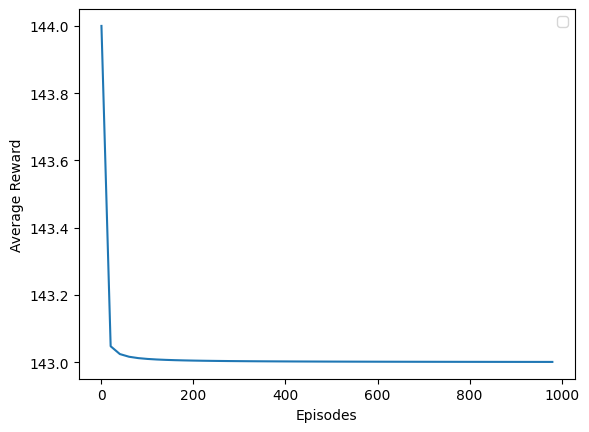

In [55]:
plt.plot(episodes,avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.savefig("Avg_poison.png")

In [56]:
suc = [x for x in suc_rate[::20]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


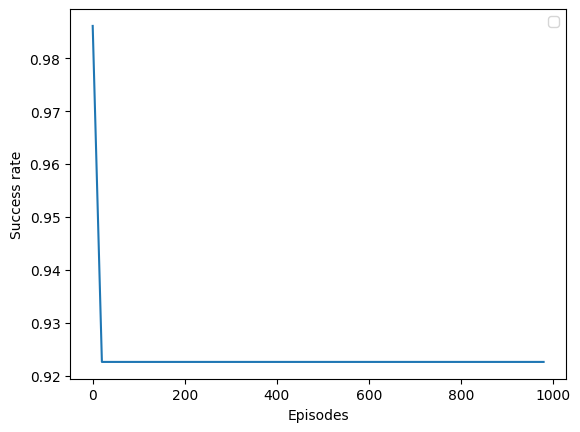

In [57]:
plt.plot(episodes,suc)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
plt.savefig("suc_poison.png")

In [125]:
len(epsilon)

1000

No handles with labels found to put in legend.


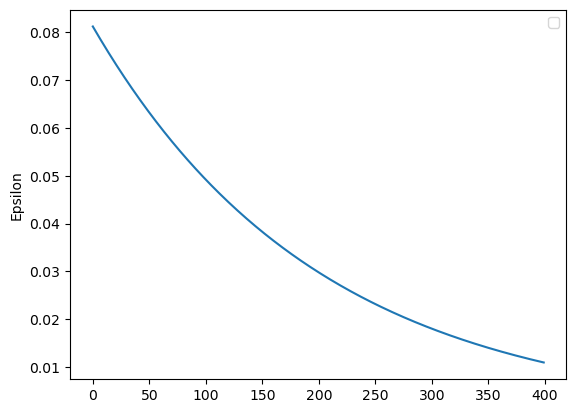

In [32]:
plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend()
plt.savefig("epsilon_normal.png")

In [56]:
epsilon[500:600]

[0.0811640021330769,
 0.08075818212241151,
 0.08035439121179945,
 0.07995261925574046,
 0.07955285615946175,
 0.07915509187866444,
 0.07875931641927113,
 0.07836551983717477,
 0.07797369223798889,
 0.07758382377679894,
 0.07719590465791494,
 0.07680992513462537,
 0.07642587550895225,
 0.07604374613140748,
 0.07566352740075044,
 0.07528520976374668,
 0.07490878371492794,
 0.0745342397963533,
 0.07416156859737154,
 0.07379076075438468,
 0.07342180695061275,
 0.07305469791585968,
 0.07268942442628039,
 0.07232597730414898,
 0.07196434741762824,
 0.0716045256805401,
 0.0712465030521374,
 0.0708902705368767,
 0.07053581918419231,
 0.07018314008827135,
 0.06983222438783,
 0.06948306326589085,
 0.0691356479495614,
 0.06878996970981359,
 0.06844601986126451,
 0.06810378976195819,
 0.0677632708131484,
 0.06742445445908266,
 0.06708733218678724,
 0.0667518955258533,
 0.06641813604822402,
 0.0660860453679829,
 0.06575561514114299,
 0.06542683706543727,
 0.06509970288011008,
 0.06477420436570952,


In [57]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [91.16156166492583, 88.48133165642888],
             (0, 0, 0, 0): [91.27154784104732, 88.52143034257763],
             (19, 0, 0, 0): [91.04949229718942, 88.49138593310467],
             (29, 0, 0, 0): [90.93841890586829, 88.26712503531989],
             (39, 0, 0, 0): [90.83114398540826, 88.35966305840863],
             (49, 0, 0, 0): [90.72795984687136, 88.30241489162998],
             (59, 0, 0, 0): [90.62723461335692, 88.39399966287282],
             (69, 0, 0, 0): [90.52472565439504, 88.51489432200268],
             (79, 0, 0, 0): [90.420706545015, 88.39523769225903],
             (89, 0, 0, 0): [90.3522295755977, 87.79095613415146],
             (99, 0, 0, 0): [90.19016527211195, 88.03987180257656],
             (109, 0, 0, 0): [89.40050732077955, 87.29515578810324],
             (119, 0, 0, 0): [91.6794757049803, 88.92880060146807],
             (129, 0, 0, 0): [91.58366825948409, 89.0338811458372],
        

In [75]:
def undiscetize_state(discretized_state, state_discretizer, state_ranges):
    """
    Convert a discretized tuple back into a continuous state.

    Args:
        discretized_state: Tuple representing the discretized state.
        state_discretizer: Tuple with the number of bins for each feature.
        state_ranges: List of tuples representing the (min, max) range for each feature.

    Returns:
        A list representing the continuous state.
    """
    continuous_state = []
    for i, value in enumerate(discretized_state):
        min_val, max_val = state_ranges[i]
        bin_size = (max_val - min_val) / state_discretizer[i]
        # Map the discretized value to the center of the bin
        continuous_value = min_val + (value + 0.5) * bin_size
        continuous_state.append(continuous_value)
    
    return continuous_state

In [76]:
state_ranges = [
    (0, 143),  # First feature range: 0 to 143
    (0, 1),    # Second feature range: 0 or 1
    (0, 4),    # Third feature range: 0 to 4
    (0, 1)     # Fourth feature range: 0 or 1
]

In [77]:
discretized_state = (689, 0, 0, 2)

In [78]:
undiscetize_state(discretized_state, state_discretizer, state_ranges)

[9859.85, 0.25, 1.0, 1.25]